# CTA 程序化交易踩坑系列二

本文复刻VNPY官方在知乎上发布的【Elite量化策略实验室】RUMI策略 1 和 2  



和官方原文的区别是使用开源版的vnpy_ctastrategy模块进行复现.

## 策略核心: 

快慢双均线偏离差值进行平滑处理后得到RUMI序列

## 交易信号:  
* RUMI上穿0轴, 买入做多
* RUMI下穿0轴, 卖出做空

该策略的优点对传统的金叉死叉信号做了平滑处理, 避免均线缠绕时, 反复开平仓的尴尬情况.

复现的策略文件针对每个品种使用不同K线窗口, 如30分钟K线, 25分钟K线, 20分钟K线.   
设置了固定百分比的止损(止盈)百分比.  
对每次开仓手数,根据时序波动的大小做了调整.  
同时设置了最大持仓时间限制.

在此感谢VNPY官方团队在程序化交易上的策略分享.

本文所有rumi.py, bar_generator.py 以及rumi_strategy_backtesting.ipynb已上传至github.


# 螺纹钢


2024-04-17 16:35:42.708128	开始加载历史数据
2024-04-17 16:35:42.708128	加载进度：# [0%]
2024-04-17 16:35:44.886791	加载进度：# [10%]
2024-04-17 16:35:47.164437	加载进度：## [20%]
2024-04-17 16:35:49.463427	加载进度：### [30%]
2024-04-17 16:35:51.855300	加载进度：#### [40%]
2024-04-17 16:35:54.485933	加载进度：##### [50%]
2024-04-17 16:35:56.519826	加载进度：###### [60%]
2024-04-17 16:35:58.873587	加载进度：####### [70%]
2024-04-17 16:36:01.275880	加载进度：######## [80%]
2024-04-17 16:36:03.751736	加载进度：######### [90%]
2024-04-17 16:36:05.814579	加载进度：########## [100%]
2024-04-17 16:36:05.815578	历史数据加载完成，数据量：491235
2024-04-17 16:36:05.912600	策略初始化完成
2024-04-17 16:36:05.912600	开始回放历史数据
2024-04-17 16:36:06.184285	回放进度：= [0%]
2024-04-17 16:36:06.450449	回放进度：== [10%]
2024-04-17 16:36:06.709637	回放进度：=== [20%]
2024-04-17 16:36:06.974254	回放进度：==== [30%]
2024-04-17 16:36:07.238448	回放进度：===== [40%]
2024-04-17 16:36:07.498058	回放进度：====== [50%]
2024-04-17 16:36:08.339147	回放进度：======= [60%]
2024-04-17 16:36:08.602541	回放进度：======== [70%]
2024-04-17 16:

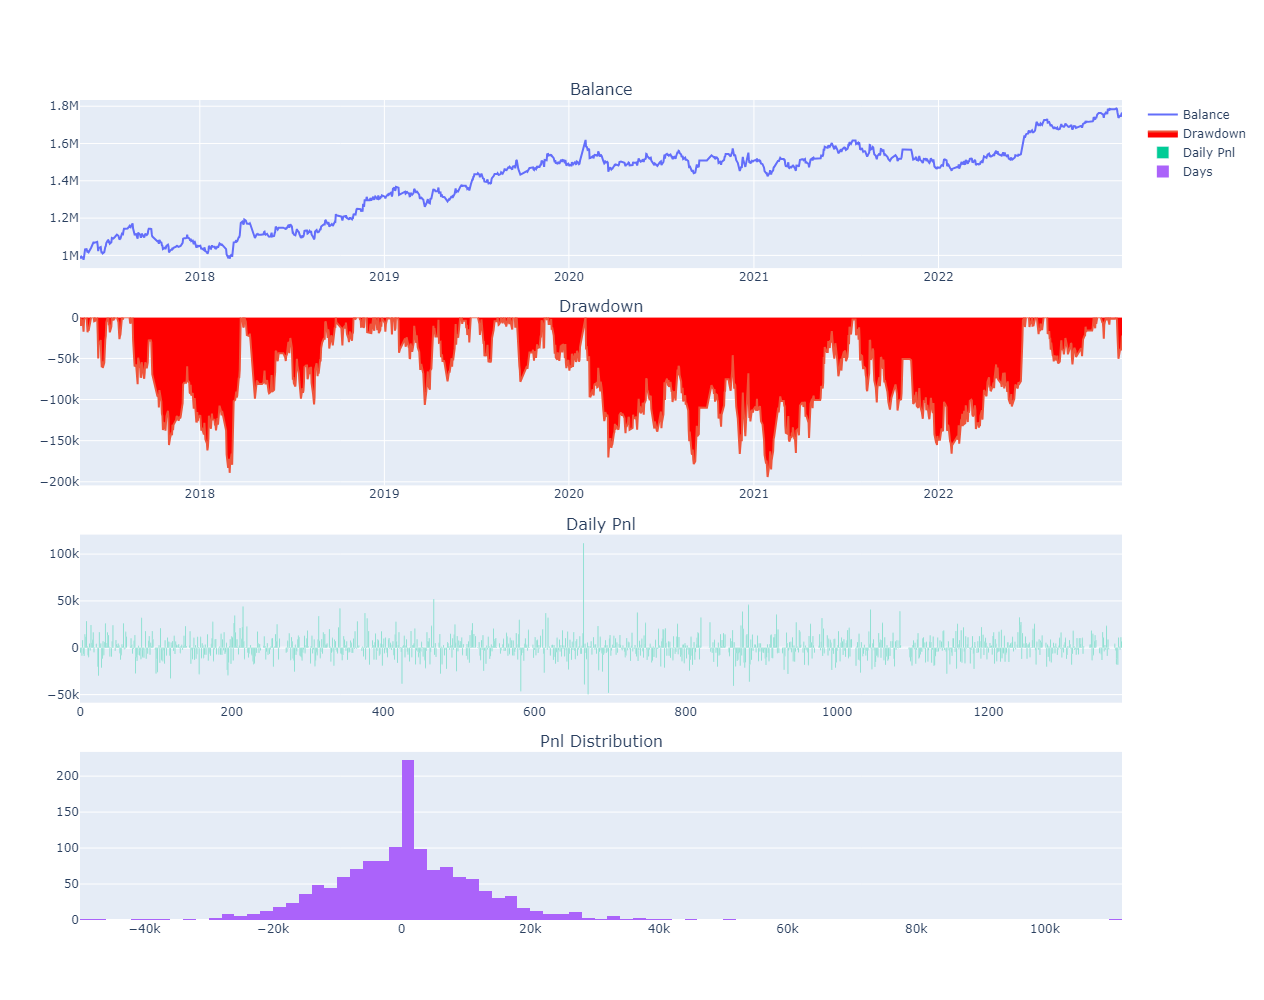

In [1]:
from datetime import datetime

from vnpy_ctastrategy.backtesting import BacktestingEngine
from vnpy.trader.object import Interval
from rumi import RumiStrategy
engine = BacktestingEngine()

engine.set_parameters(
    vt_symbol = "rb99.SHFE",
    interval = Interval.MINUTE,
    start = datetime(2017, 1, 1),
    end = datetime(2023, 1, 1),
    rate = 0.0001,
    slippage = 1,
    size = 10,
    pricetick = 1,
    capital = 1000000,
)

setting = {
    "fast_window": 2,
    "slow_window": 60,
    "rumi_window": 12,
    "trailing_percent": 0.04,
    "K_window": 30,
    "max_holding_window": 80
}
engine.add_strategy(RumiStrategy, setting)
engine.load_data()
engine.run_backtesting()
result = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

# 沪铝

2024-04-17 16:42:42.150495	开始加载历史数据
2024-04-17 16:42:42.151029	加载进度：# [0%]
2024-04-17 16:42:42.151495	加载进度：# [10%]
2024-04-17 16:42:42.152495	加载进度：## [20%]
2024-04-17 16:42:42.153495	加载进度：### [30%]
2024-04-17 16:42:42.154495	加载进度：#### [40%]
2024-04-17 16:42:42.156496	加载进度：##### [50%]
2024-04-17 16:42:42.157496	加载进度：###### [60%]
2024-04-17 16:42:42.158496	加载进度：####### [70%]
2024-04-17 16:42:42.160497	加载进度：######## [80%]
2024-04-17 16:42:42.161497	加载进度：######### [90%]
2024-04-17 16:42:42.162497	加载进度：########## [100%]
2024-04-17 16:42:42.162497	历史数据加载完成，数据量：654195
2024-04-17 16:42:42.253166	策略初始化完成
2024-04-17 16:42:42.253166	开始回放历史数据
2024-04-17 16:42:42.652519	回放进度：= [0%]
2024-04-17 16:42:43.016600	回放进度：== [10%]
2024-04-17 16:42:43.424389	回放进度：=== [20%]
2024-04-17 16:42:43.787014	回放进度：==== [30%]
2024-04-17 16:42:44.150677	回放进度：===== [40%]
2024-04-17 16:42:44.515396	回放进度：====== [50%]
2024-04-17 16:42:44.875030	回放进度：======= [60%]
2024-04-17 16:42:45.233776	回放进度：======== [70%]
2024-04-17 16:

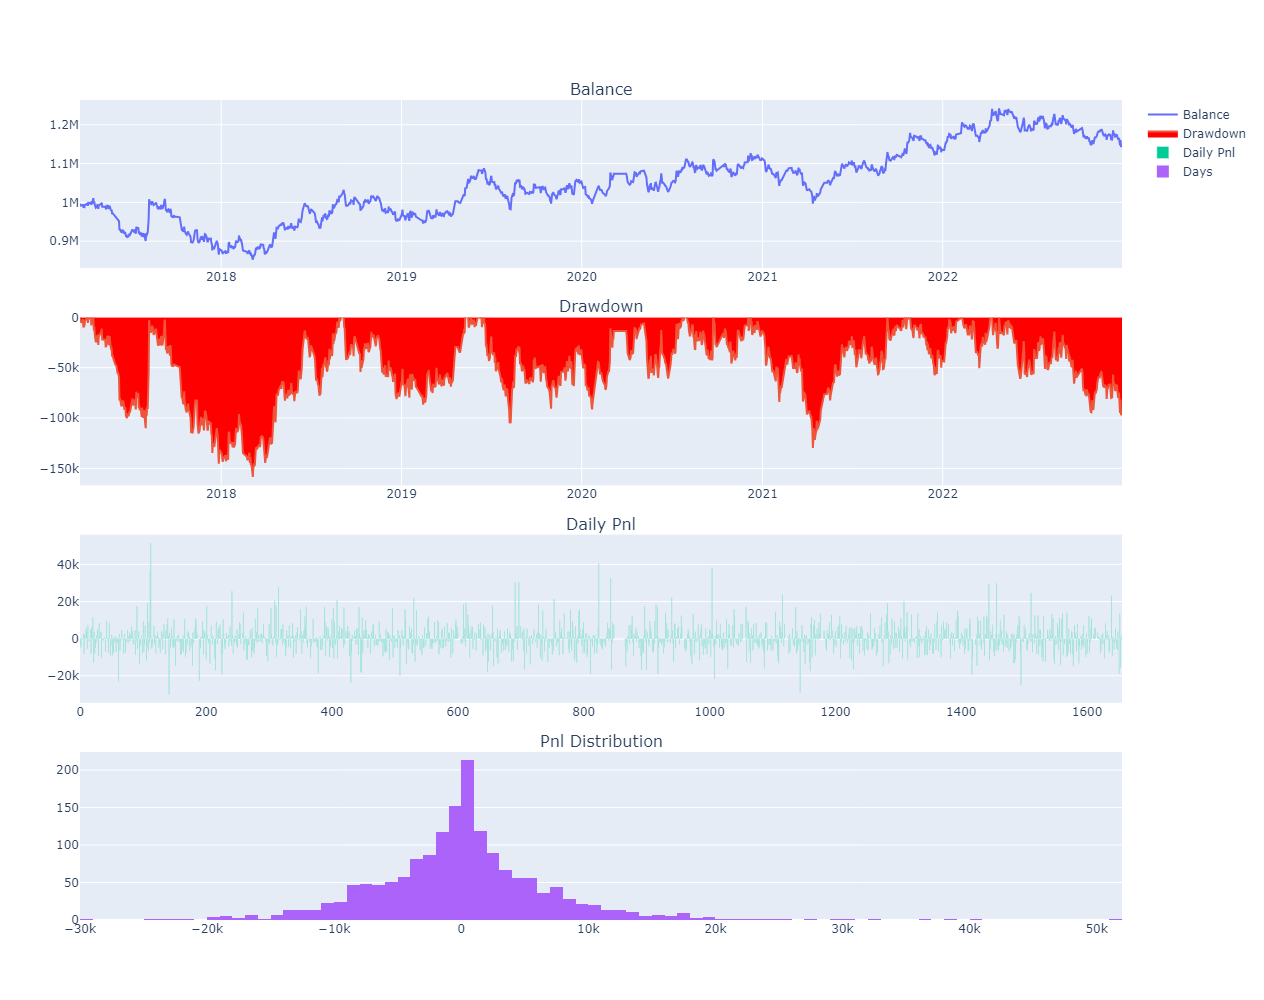

In [6]:
from datetime import datetime

from vnpy_ctastrategy.backtesting import BacktestingEngine
from vnpy.trader.object import Interval
from rumi import RumiStrategy
engine = BacktestingEngine()

engine.set_parameters(
    vt_symbol = "al99.SHFE",
    interval = Interval.MINUTE,
    start = datetime(2017, 1, 1),
    end = datetime(2023, 1, 1),
    rate = 0.0001,
    slippage = 1,
    size = 5,
    pricetick = 5,
    capital = 1000000,
)

setting = {
    "fast_window": 2,
    "slow_window": 10,
    "rumi_window": 40,
    "trailing_percent": 0.04,
    "K_window": 25,
    "max_holding_window": 100
}
engine.add_strategy(RumiStrategy, setting)
engine.load_data()
engine.run_backtesting()
result = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

# 热轧卷板


2024-04-17 16:36:45.766971	开始加载历史数据
2024-04-17 16:36:45.766971	加载进度：# [0%]
2024-04-17 16:36:47.803339	加载进度：# [10%]
2024-04-17 16:36:51.157438	加载进度：## [20%]
2024-04-17 16:36:53.125785	加载进度：### [30%]
2024-04-17 16:36:56.571776	加载进度：#### [40%]
2024-04-17 16:36:58.594950	加载进度：##### [50%]
2024-04-17 16:37:00.254011	加载进度：###### [60%]
2024-04-17 16:37:03.863315	加载进度：####### [70%]
2024-04-17 16:37:05.810021	加载进度：######## [80%]
2024-04-17 16:37:07.796656	加载进度：######### [90%]
2024-04-17 16:37:09.830716	加载进度：########## [100%]
2024-04-17 16:37:09.831716	历史数据加载完成，数据量：491235
2024-04-17 16:37:09.933739	策略初始化完成
2024-04-17 16:37:09.933739	开始回放历史数据
2024-04-17 16:37:10.212407	回放进度：= [0%]
2024-04-17 16:37:10.477939	回放进度：== [10%]
2024-04-17 16:37:10.753549	回放进度：=== [20%]
2024-04-17 16:37:11.018608	回放进度：==== [30%]
2024-04-17 16:37:11.279345	回放进度：===== [40%]
2024-04-17 16:37:11.534947	回放进度：====== [50%]
2024-04-17 16:37:11.792107	回放进度：======= [60%]
2024-04-17 16:37:12.057167	回放进度：======== [70%]
2024-04-17 16:

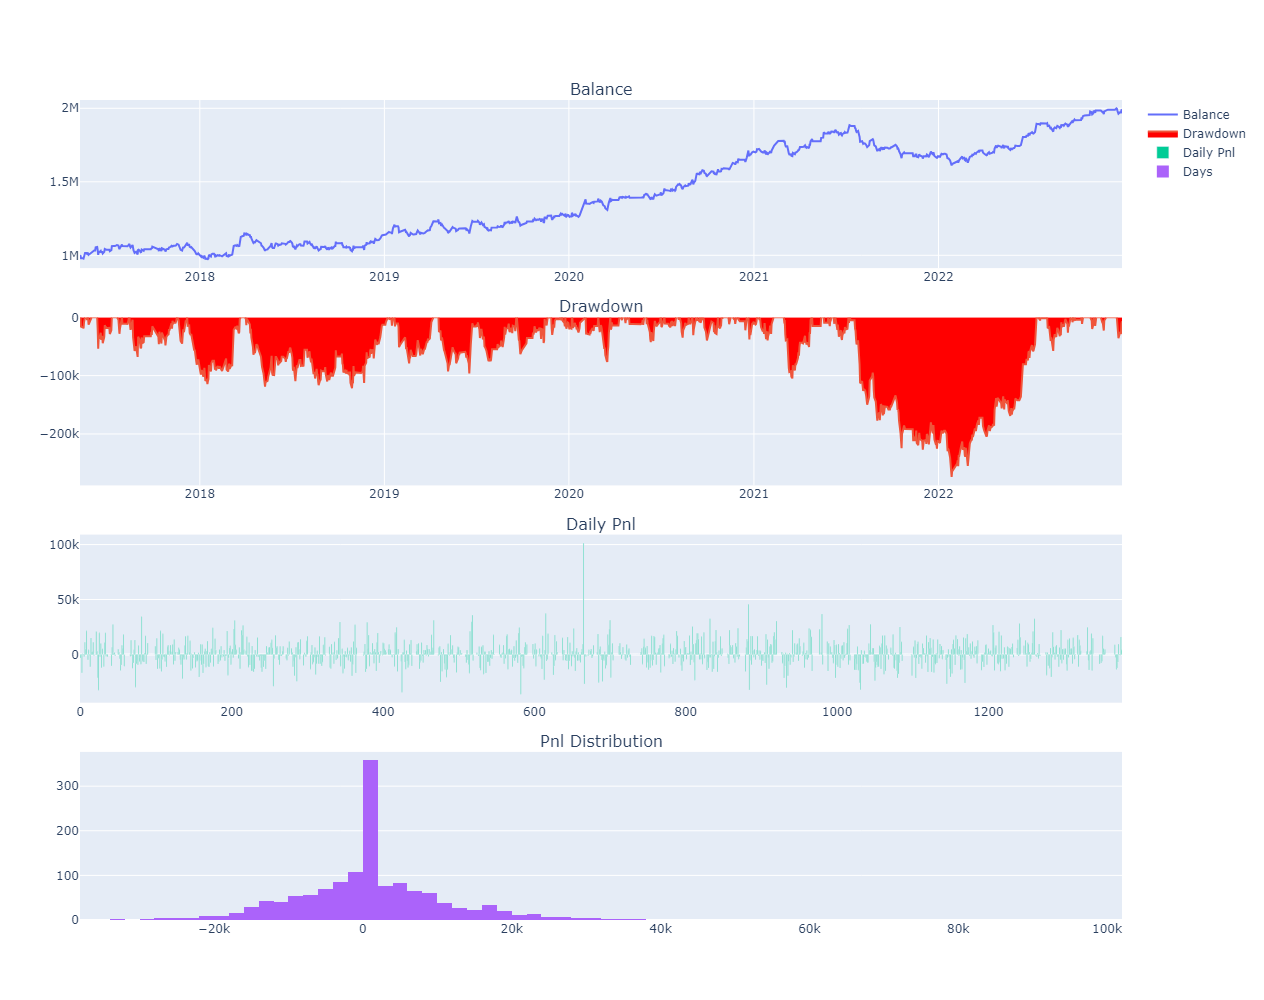

In [3]:
from datetime import datetime

from vnpy_ctastrategy.backtesting import BacktestingEngine
from vnpy.trader.object import Interval
from rumi import RumiStrategy
engine = BacktestingEngine()


engine.set_parameters(
    vt_symbol = "hc99.SHFE",
    interval = Interval.MINUTE,
    start = datetime(2017, 1, 1),
    end = datetime(2023, 1, 1),
    rate = 0,
    slippage = 1,
    size = 10,
    pricetick = 1,
    capital = 1000000,
)

setting = {
    "fast_window": 2,
    "slow_window": 60,
    "rumi_window": 12,
    "trailing_percent": 0.04,
    "K_window": 25,
    "max_holding_window": 50
}
engine.add_strategy(RumiStrategy, setting)
engine.load_data()
engine.run_backtesting()
result = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

# 焦炭

2024-04-17 16:37:12.711456	开始加载历史数据
2024-04-17 16:37:12.711456	加载进度：# [0%]
2024-04-17 16:37:16.750647	加载进度：# [10%]
2024-04-17 16:37:18.937830	加载进度：## [20%]
2024-04-17 16:37:21.132816	加载进度：### [30%]
2024-04-17 16:37:25.245901	加载进度：#### [40%]
2024-04-17 16:37:27.285424	加载进度：##### [50%]
2024-04-17 16:37:28.948740	加载进度：###### [60%]
2024-04-17 16:37:30.929392	加载进度：####### [70%]
2024-04-17 16:37:35.091741	加载进度：######## [80%]
2024-04-17 16:37:37.059126	加载进度：######### [90%]
2024-04-17 16:37:39.103789	加载进度：########## [100%]
2024-04-17 16:37:39.104788	历史数据加载完成，数据量：507135
2024-04-17 16:37:39.282373	策略初始化完成
2024-04-17 16:37:39.282373	开始回放历史数据
2024-04-17 16:37:39.595678	回放进度：= [0%]
2024-04-17 16:37:39.900877	回放进度：== [10%]
2024-04-17 16:37:40.197944	回放进度：=== [20%]
2024-04-17 16:37:40.497762	回放进度：==== [30%]
2024-04-17 16:37:40.799732	回放进度：===== [40%]
2024-04-17 16:37:41.098800	回放进度：====== [50%]
2024-04-17 16:37:41.394557	回放进度：======= [60%]
2024-04-17 16:37:41.687174	回放进度：======== [70%]
2024-04-17 16:

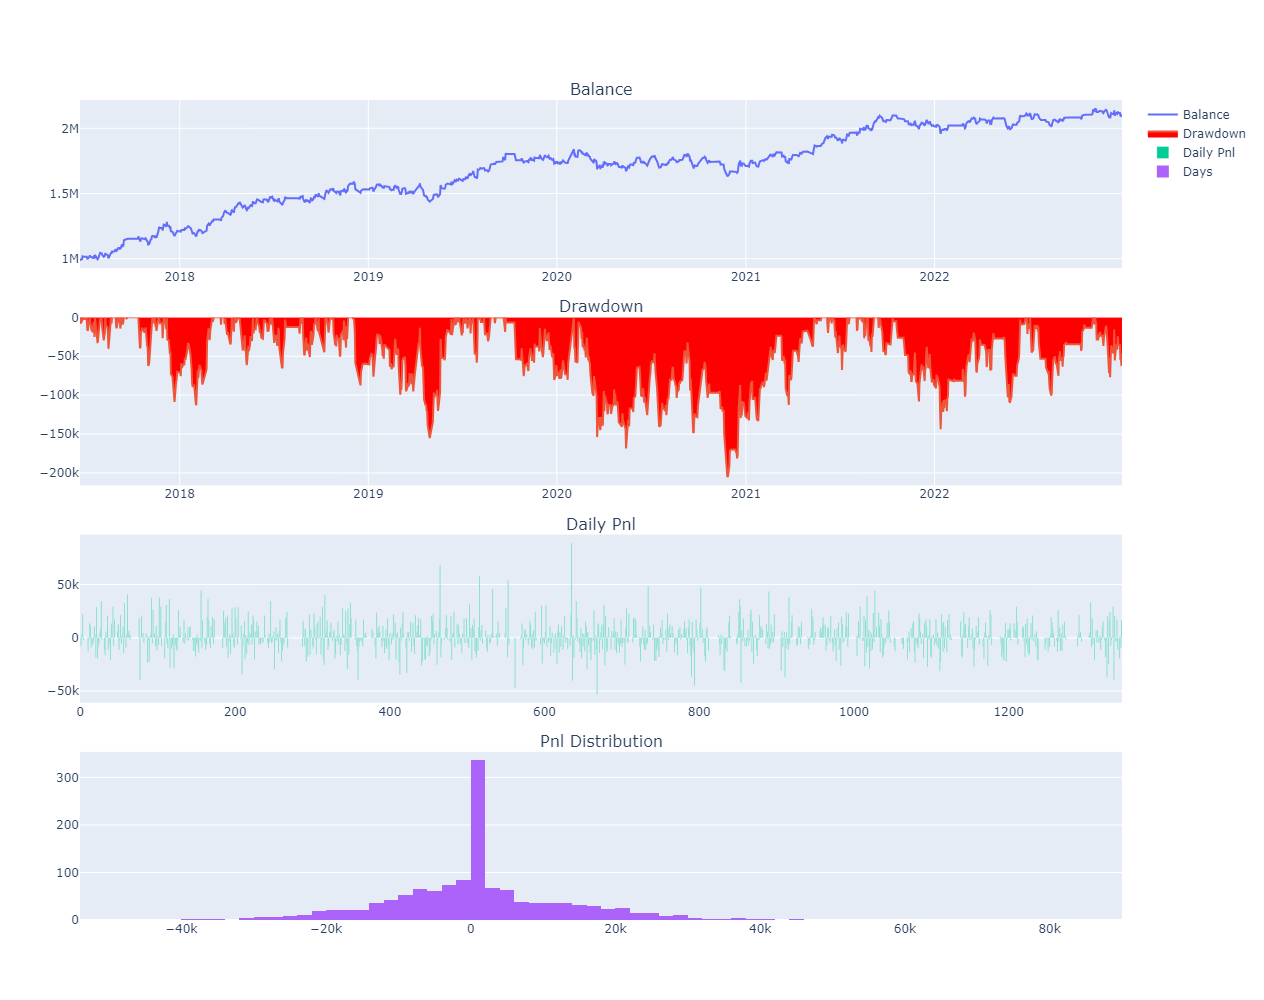

In [4]:
from datetime import datetime

from vnpy_ctastrategy.backtesting import BacktestingEngine
from vnpy.trader.object import Interval
from rumi import RumiStrategy
engine = BacktestingEngine()


engine.set_parameters(
    vt_symbol = "j99.DCE",
    interval = Interval.MINUTE,
    start = datetime(2017, 1, 1),
    end = datetime(2023, 1, 1),
    rate = 0.0003,
    slippage = 1,
    size = 100,
    pricetick = 0.5,
    capital = 1000000,
)

setting = {
    "fast_window": 2,
    "slow_window": 70,
    "rumi_window": 32,
    "trailing_percent": 0.04,
    "contract_size": 100,
    "K_window": 20,
    "max_holding_window": 80
}
engine.add_strategy(RumiStrategy, setting)
engine.load_data()
engine.run_backtesting()
result = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()